Dataset
- title: title of the article.
- news_url: URL of the article.
- source domain: web domain where article was posted.
- tweet_num: number of retweets for this article.
- real: label column, where 1 is real and 0 is fake.

In [72]:
import numpy as np
import pandas as pd

In [73]:
df = pd.read_csv('/content/FakeNewsNet.csv')

In [74]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [75]:
df.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [76]:
df.shape

(23196, 5)

In [77]:
df.isnull().sum()

,0
title,0
news_url,330
source_domain,330
tweet_num,0
real,0


In [78]:
df['real'].value_counts()

,count
real,
1,17441
0,5755


In [79]:
#as the dataset is large so we cannot drop the nullcase... so we have to fill it
df = df.fillna('')

In [80]:
df.isnull().sum()

,0
title,0
news_url,0
source_domain,0
tweet_num,0
real,0


In [81]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

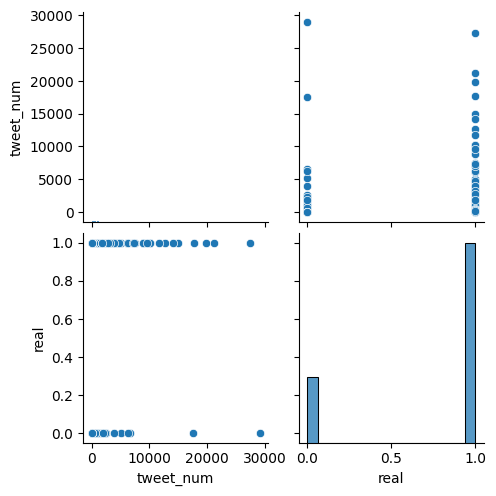

In [12]:
sns.pairplot(df)
plt.show()

In [83]:
# so from above we can conclude that no. of tweets does not matter
df = df.drop(columns=['tweet_num'])

In [84]:
#news_url and source domain are same so lets drop source domain
df = df.drop(columns=['source_domain'])

In [85]:
df.head()

,title,news_url,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,1


In [86]:
#lets merge the title and news_url as contet
df['content'] = df['title']+' '+df['news_url']

In [87]:
df.drop(columns=['title','news_url'],inplace=True)

In [88]:
df.head()

,real,content
0,1,Kandi Burruss Explodes Over Rape Accusation on...
1,1,People's Choice Awards 2018: The best red carp...
2,1,Sophia Bush Sends Sweet Birthday Message to 'O...
3,1,Colombian singer Maluma sparks rumours of inap...
4,1,Gossip Girl 10 Years Later: How Upper East Sid...


In [89]:
X = df.drop(columns='real',axis=1)
Y = df['real']

In [92]:
X.head()

,content
0,Kandi Burruss Explodes Over Rape Accusation on...
1,People's Choice Awards 2018: The best red carp...
2,Sophia Bush Sends Sweet Birthday Message to 'O...
3,Colombian singer Maluma sparks rumours of inap...
4,Gossip Girl 10 Years Later: How Upper East Sid...


In [93]:
Y.head()

,real
0,1
1,1
2,1
3,1
4,1


Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [94]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [95]:
port_stem = PorterStemmer()

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [98]:
df['content'] = df['content'].apply(stemming)

In [99]:
print(df['content'])

0        kandi burruss explod rape accus real housew at...
1        peopl choic award best red carpet look http ww...
2        sophia bush send sweet birthday messag one tre...
3        colombian singer maluma spark rumour inappropr...
4        gossip girl year later upper east sider shock ...
                               ...                        
23191    pippa middleton wed case miss pippa marri lace...
23192    zayn malik gigi hadid shock split chanc reunit...
23193    jessica chastain recal moment mother boyfriend...
23194    tristan thompson feel dump khlo kardashian ref...
23195    kelli clarkson perform medley kendrick lamar h...
Name: content, Length: 23196, dtype: object


In [100]:
#separating the data and labels
X = df['content'].values
Y = df['real'].values

In [101]:
print(X)

['kandi burruss explod rape accus real housew atlanta reunion video http toofab com real housew atlanta kandi burruss rape phaedra park porsha william'
 'peopl choic award best red carpet look http www today com style see peopl choic award red carpet look'
 'sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva http www etonlin com news sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva'
 ...
 'jessica chastain recal moment mother boyfriend slap kick genit http www justjar com jessica chastain recal moment mother boyfriend slap kick genit'
 'tristan thompson feel dump khlo kardashian refus let move la home exclus www intouchweekli com post tristan thompson feel dump khloe kardashian'
 'kelli clarkson perform medley kendrick lamar humbl hit billboard music award http www billboard com articl news bbma kelli clarkson medley bbma']


In [102]:
Y.shape

(23196,)

stemming == coverting to words
then

tfif == converting numerical



In [103]:
#coverting the textual data to numerical data
vectorizer = TfidfVectorizer(max_features=17314, stop_words='english')  # fix feature size
vectorizer.fit(X)

X = vectorizer.transform(X)

In [104]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 304156 stored elements and shape (23196, 17178)>
  Coords	Values
  (0, 175)	0.14434726829473674
  (0, 886)	0.3389455172701989
  (0, 2203)	0.4346705393896895
  (0, 3124)	0.028363875555072016
  (0, 5193)	0.19914481139678233
  (0, 7150)	0.27967207824608226
  (0, 7186)	0.03029315079920102
  (0, 8078)	0.4346705393896895
  (0, 11214)	0.16947275863509945
  (0, 11451)	0.2113369959982094
  (0, 11757)	0.21414819505876584
  (0, 12266)	0.33456306448701023
  (0, 12326)	0.2501629274621897
  (0, 12644)	0.1394415242605404
  (0, 15397)	0.1652746695506423
  (0, 16224)	0.1037611672890413
  (0, 16697)	0.12458641416073078
  (1, 975)	0.3389228488122217
  (1, 1520)	0.18383033446626795
  (1, 2455)	0.42077841207715844
  (1, 2832)	0.47231495026575826
  (1, 3124)	0.04565940860063079
  (1, 7186)	0.0487651043121964
  (1, 8977)	0.36795284748751195
  (1, 11377)	0.2591901649005516
  :	:
  (23194, 8250)	0.15997986269782055
  (23194, 8488)	0.1748832233759851

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Logistic regression

In [106]:
model = LogisticRegression()

In [107]:
model.fit(X_train,Y_train)

LogisticRegression()

In [108]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [109]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9509592584608751


In [110]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [111]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9271551724137931


Making a Prediction System


In [112]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [113]:
print(Y_test[3])

0


In [114]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [115]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))